 ##                     <font color = red size =15> Solution of Linear Regression Assignment </font>


<img src="carprediction.jpeg" width="500" height="300">

#### <font color = VIOLET size = 5 > Problem Statement:</font>


Chineese company **Geely Auto aspires** to enter the US market & compete local one's.




### <font color = BROWN size = 4> Business Objective : </font>


- Which variables are significant in predicting the price of a car

- How well those variables describe the price of a car.

**Model the price of cars with the available features**

##  <font color = GOLDGREEN size = 5> Step 1: Reading and Understanding the Data</font>

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
cars = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
# Check the head of the dataset
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<font color = "Black Gold">**Inspect the various aspects of the housing dataframe**</font>

In [5]:
#Shape of Df:
cars.shape

(205, 26)

<font size = 5 color = blue> **Inference:** </font>    
    <br>
- Here no of rows: 205 & columns: 26

In [6]:
#Cars Metadata:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

<font size = 5 color = blue> **Inference:** </font>    
    <br>
- We can understand that, in all 26 columns we don't have any null values, as we can see non-null count 205 for all the columns
- We can see out of 26 columns : 16 columns are numeric (8 cols are float64 , 8 cols are int64) and 10 cols are object type means categorical.
- But we have 11 categorical columns, as "symboling" column is Categorical field but with numeric representation by insurance companies.So, we have to handle the same.

<font size = 5 color = Goldblue> **Handling Categorical types:** </font>    
    <br>

In [7]:
cars['symboling'] = cars['symboling'].astype('object')

In [8]:
#Cars Metadata:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null object
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm     

 <font size = 5 color = blue> **Inference:** </font>    
    <br>
    
- Cars Symboling column changed from Numeric column to Categorical/Object type    

In [9]:
#OBJECT TYPE/Categorical columns

#Filtering object type columns alone:
object_cols = cars.loc[:, cars.dtypes == np.object]
object_cols.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

In [10]:
object_cols.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [11]:
#For Numeric columns info:
cars.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


 <font size = 5 color = blue> **Inference:** </font>    
    <br>
    
- Cars Numeric columns statistics 

<font size = 5 color = Red> __DATA QUALITY CHECKS__:</font>


<font size = 5 color = GREEN> __Missing value Handling__:</font>

In [12]:
#Checking the Null values in dataframe rows:
cars.isnull().sum(axis =1).any()

False

<font size = 5 color = blue> **Inference:** </font>    
    <br>
    
- Cars df don't have null value in all rows  

In [13]:
#Checking the NA values in dataframe:
cars.isna().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

<font size = 5 color = blue> **Inference:** </font>    
    <br>
    
- Cars df don't have any NA values  

 <font size = 5 color = GREEN> __Duplicates Handling__:</font>

In [14]:
#Checking the duplicate car id:
cars_dup = cars[cars.duplicated(['car_ID'])]
print(cars_dup)

Empty DataFrame
Columns: [car_ID, symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []

[0 rows x 26 columns]


<font size = 5 color = blue> **Inference:** </font>    
    <br>
    
- Checed car_id column have any duplicates, but None are there

In [15]:
#Checking the duplicate rows:
cars_dup = cars[cars.duplicated()]
print(cars_dup)

Empty DataFrame
Columns: [car_ID, symboling, CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, wheelbase, carlength, carwidth, carheight, curbweight, enginetype, cylindernumber, enginesize, fuelsystem, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price]
Index: []

[0 rows x 26 columns]


<font size = 5 color = blue> **Inference:** </font>    
    <br>
    
- None of the column have duplicates 

 <font size = 5 color = GREEN> __Deriving New Columns__:</font>

In [16]:
#SEPERATING CAR NAME ALONE FROM CAR+MODEL NAME:
cars['CarCompanyName'] = cars['CarName'].str.split(' ')
cars['CarCompanyName']=cars['CarCompanyName'].str[0]
cars['CarCompanyName']=cars['CarCompanyName'].str.lower()
cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompanyName
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000,audi
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000,audi
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000,audi
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000,audi
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000,audi
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167,audi


In [17]:
#Fuel economy is one of key metric for any vehicle choice
#Especially we will check mileage on both city & Highway
cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])
cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompanyName,fueleconomy
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.00,111,5000,21,27,13495.000,alfa-romero,23.70
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.00,111,5000,21,27,16500.000,alfa-romero,23.70
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.00,154,5000,19,26,16500.000,alfa-romero,22.15
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.00,102,5500,24,30,13950.000,audi,26.70
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.00,115,5500,18,22,17450.000,audi,19.80
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,3.19,3.40,8.50,110,5500,19,25,15250.000,audi,21.70
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,3.19,3.40,8.50,110,5500,19,25,17710.000,audi,21.70
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,3.19,3.40,8.50,110,5500,19,25,18920.000,audi,21.70
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,3.13,3.40,8.30,140,5500,17,20,23875.000,audi,18.35
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,3.13,3.40,7.00,160,5500,16,22,17859.167,audi,18.70


In [18]:
#Binning the Car Companies based on average prices of each & every car Company.
#Make sure price as int
cars['price'] = cars['price'].astype('int')
#Copied cars df:
car_copy = cars.copy()
#Group BY Company Name and returning the mean of Price column/feature within each group
table = car_copy.groupby(['CarCompanyName'])['price'].mean()
#Join the new df "table" & cars
car_copy = car_copy.merge(table.reset_index(), how='left',on='CarCompanyName')
#Creating bins for different Price ranges
bins = [0,10000,20000,40000]
#Categorising the cars based on price Range: 'Budget','Medium','Highend'
cars_bin=['Budget','Medium','Highend']
#Converting continous to Categorical: 
cars['carsrange'] = pd.cut(car_copy['price_y'],bins,right=False,labels=cars_bin)
cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompanyName,fueleconomy,carsrange
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.00,111,5000,21,27,13495,alfa-romero,23.70,Medium
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.00,111,5000,21,27,16500,alfa-romero,23.70,Medium
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.00,154,5000,19,26,16500,alfa-romero,22.15,Medium
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.00,102,5500,24,30,13950,audi,26.70,Medium
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.00,115,5500,18,22,17450,audi,19.80,Medium
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,3.40,8.50,110,5500,19,25,15250,audi,21.70,Medium
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,3.40,8.50,110,5500,19,25,17710,audi,21.70,Medium
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,3.40,8.50,110,5500,19,25,18920,audi,21.70,Medium
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,3.40,8.30,140,5500,17,20,23875,audi,18.35,Medium
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,3.40,7.00,160,5500,16,22,17859,audi,18.70,Medium


<font size = 5 color = blue> **Inference:** </font>    
    <br>
    
- **Derived new columns:**
<br>
<font color = Red>
. CarCompanyName
<br>
. carsrange
<br>
. fueleconomy
</font>    
- These parameters are key in Influence the cars price

 <font size = 5 color = GREEN> __Cleaning Data__:</font>

In [19]:
cars_df = cars.drop(columns = ['CarName'])
cars_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompanyName,fueleconomy,carsrange
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,13495,alfa-romero,23.70,Medium
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,16500,alfa-romero,23.70,Medium
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154,5000,19,26,16500,alfa-romero,22.15,Medium
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102,5500,24,30,13950,audi,26.70,Medium
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115,5500,18,22,17450,audi,19.80,Medium


In [20]:
#CORRECTING WRONGLY SPELLED CAR NAMES:

# maxda -> mazda
# porcshce  -> porsche
# toyouta -> toyota
# vokswagen, vw -> volkswagen

cars_df.CarCompanyName.replace(to_replace=dict(maxda='mazda',porcshce='porsche',toyouta='toyota',vokswagen='volkswagen',vw='volkswagen'),inplace=True)
cars_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompanyName,fueleconomy,carsrange
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,13495,alfa-romero,23.70,Medium
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,16500,alfa-romero,23.70,Medium
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154,5000,19,26,16500,alfa-romero,22.15,Medium
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102,5500,24,30,13950,audi,26.70,Medium
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115,5500,18,22,17450,audi,19.80,Medium


In [21]:
cars_df[cars_df['CarCompanyName']=='vw']

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompanyName,fueleconomy,carsrange


In [22]:
cars_df[cars_df['CarCompanyName']=='maxda']

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompanyName,fueleconomy,carsrange


In [23]:
cars_df[cars_df['CarCompanyName']=='vokswagen']

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompanyName,fueleconomy,carsrange


In [24]:
cars_df[cars_df['CarCompanyName']=='toyouta']

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompanyName,fueleconomy,carsrange


In [25]:
cars_df[cars_df['CarCompanyName']=='porcshce']

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompanyName,fueleconomy,carsrange


<font size = 5 color = blue> **Inference:** </font>    
    <br>
<font color = Violet>    
- Dropped useless column: CarName
- Corrected few entries of CarCompanyName which are misspelled like below:
    
> maxda -> mazda
> porcshce  -> porsche
> toyouta -> toyota
> vokswagen, vw -> volkswagen

- Now data is cleaned in all aspects.
</font>

## <font color = GOLDYELLOW> Step 2: Visualising the Data</font>

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

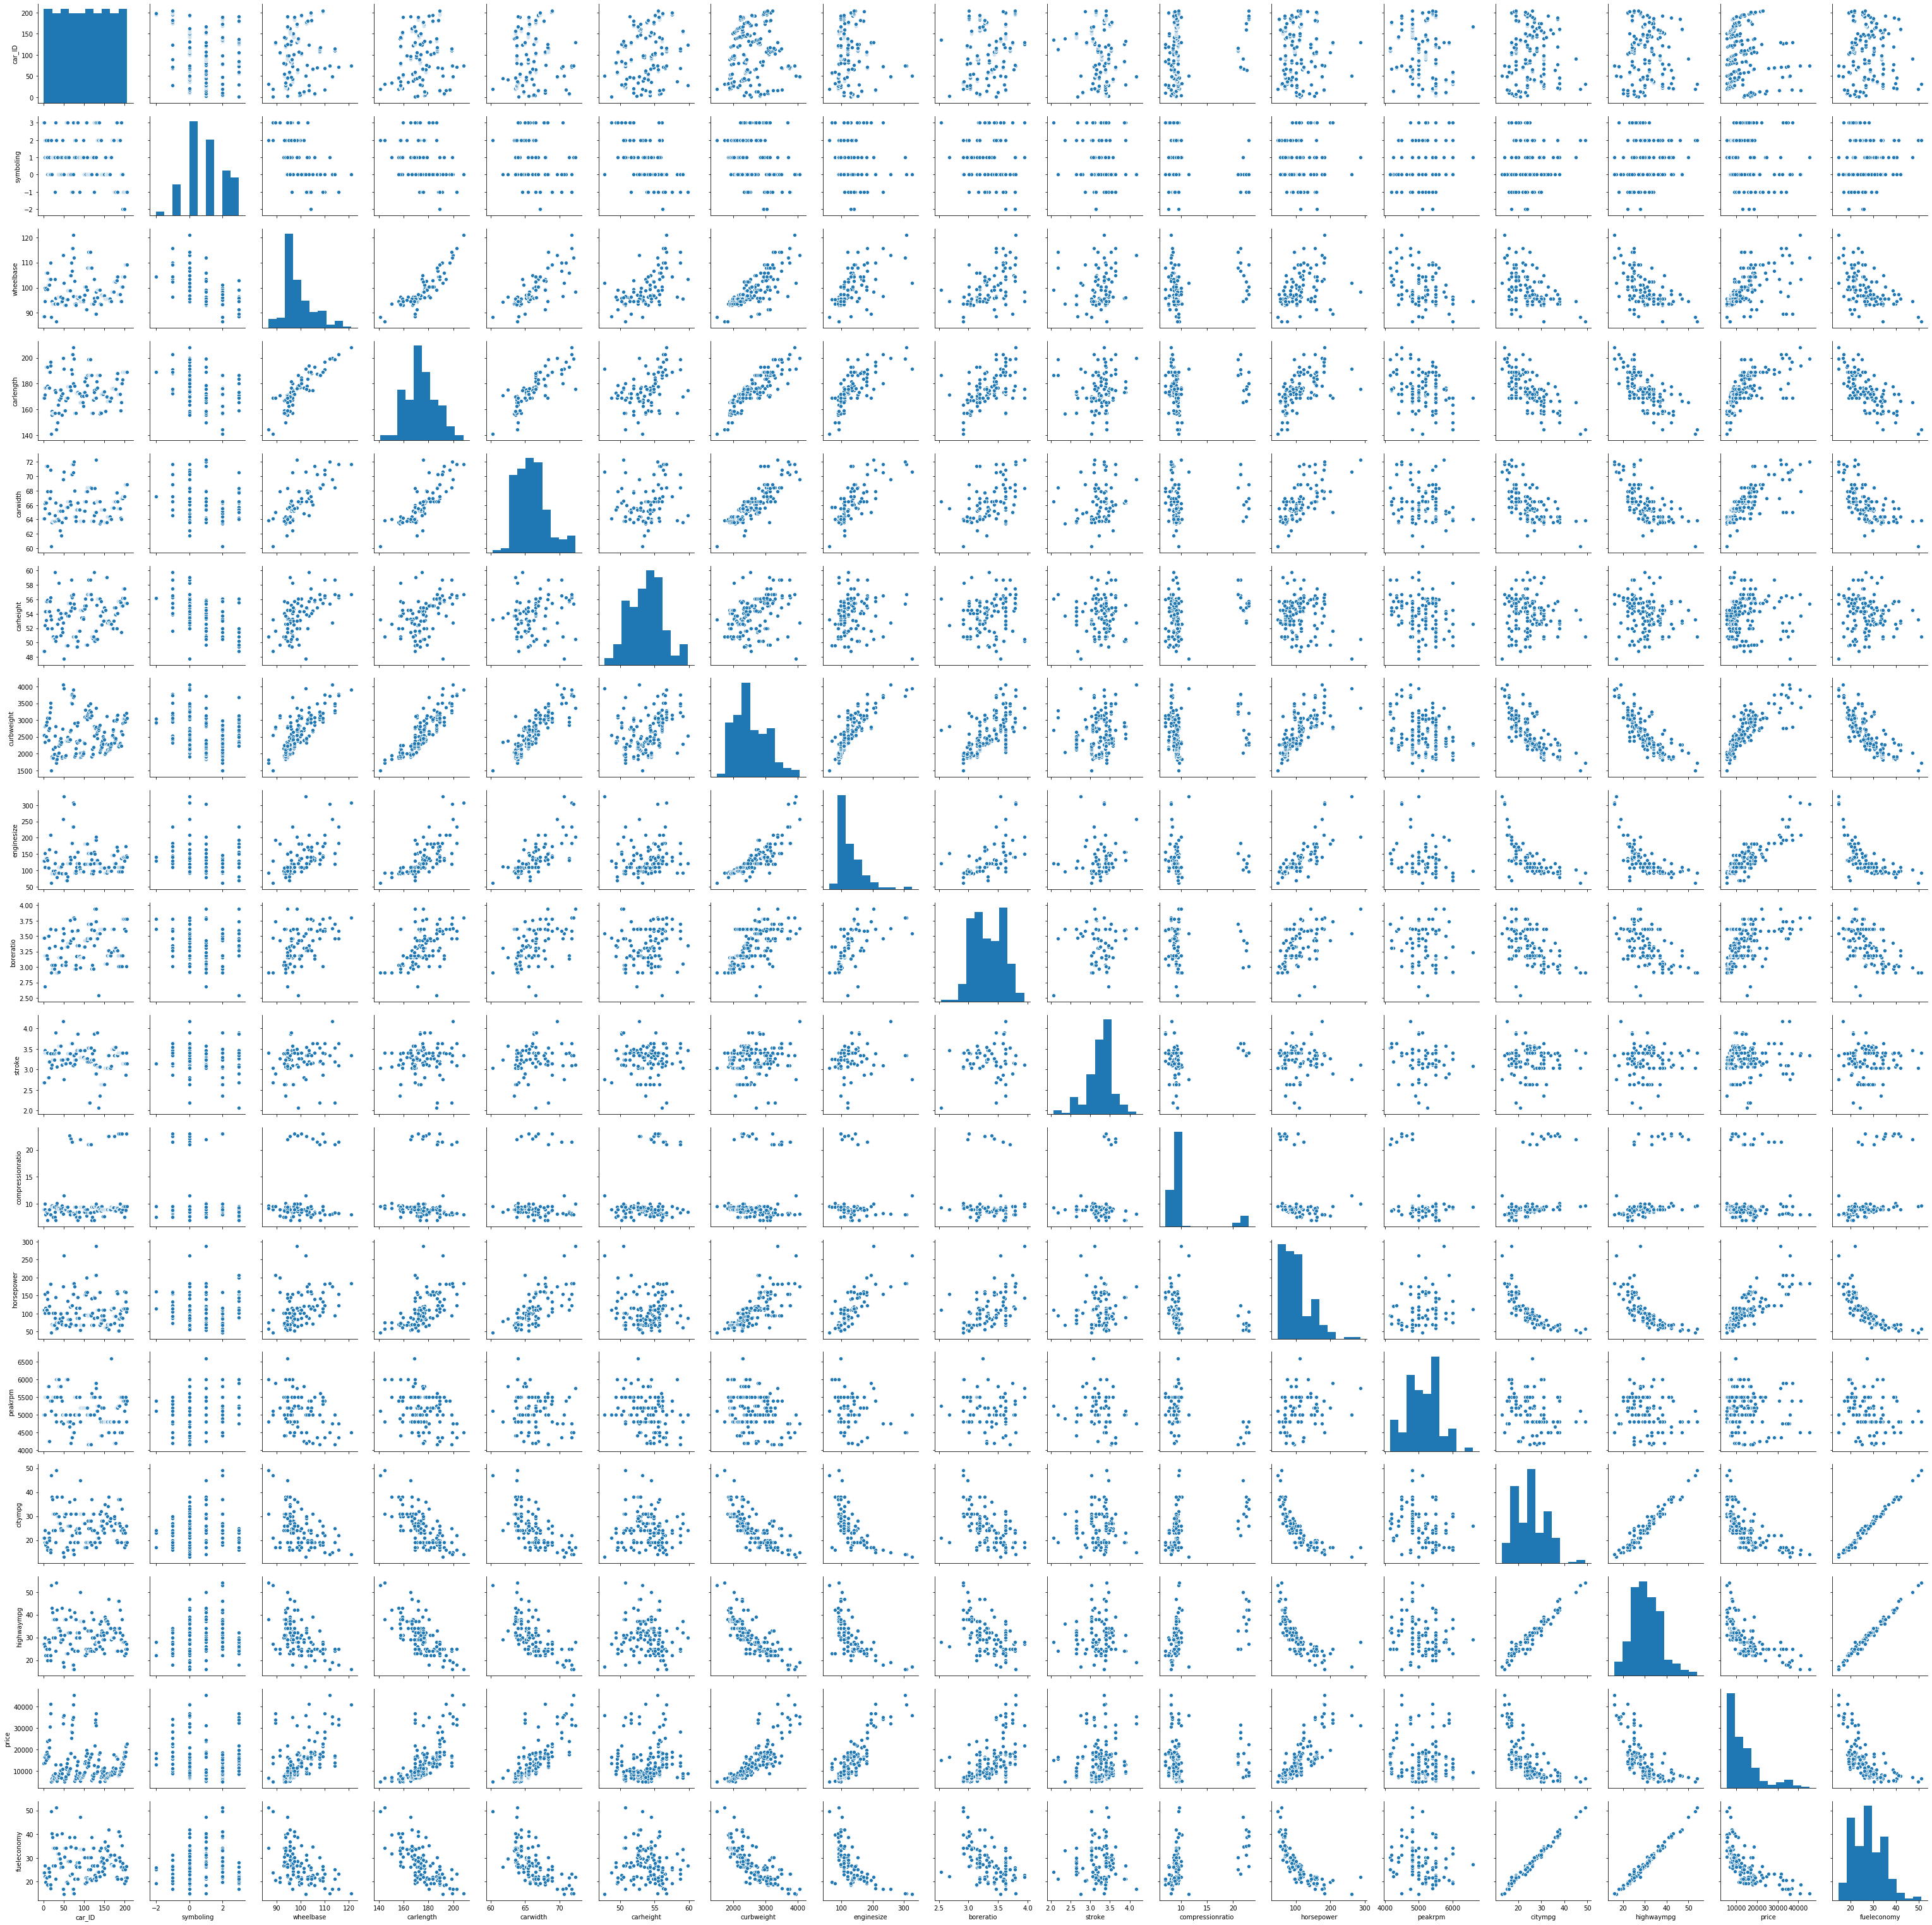

In [27]:
sns.pairplot(cars_df)
plt.show()

<font size = 5 color = blue> **Inference From above pairplot:** </font>    
    <br>
- **enginesize, boreratio, horsepower, wheelbase** - seem to have a significant <font color = Green> positive correlation with price.</font>
<br>
<br>
- **citympg, highwaympg** - seem to have a significant <font color = Red> negative correlation with price.</font>
<br>
<br>
- car Body dimensions like: **carwidth, carlength & curbweight** seems to have a <font color = Green> poitive correlation with price.</font>
<br>
<br>
- But dimension: <font color = Grey> **carheight** </font> doesn't show any significant trend with price.</font>

#### <font size =5 color = GoldGreen>  Visualizing Categorical Variables </font>

> As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

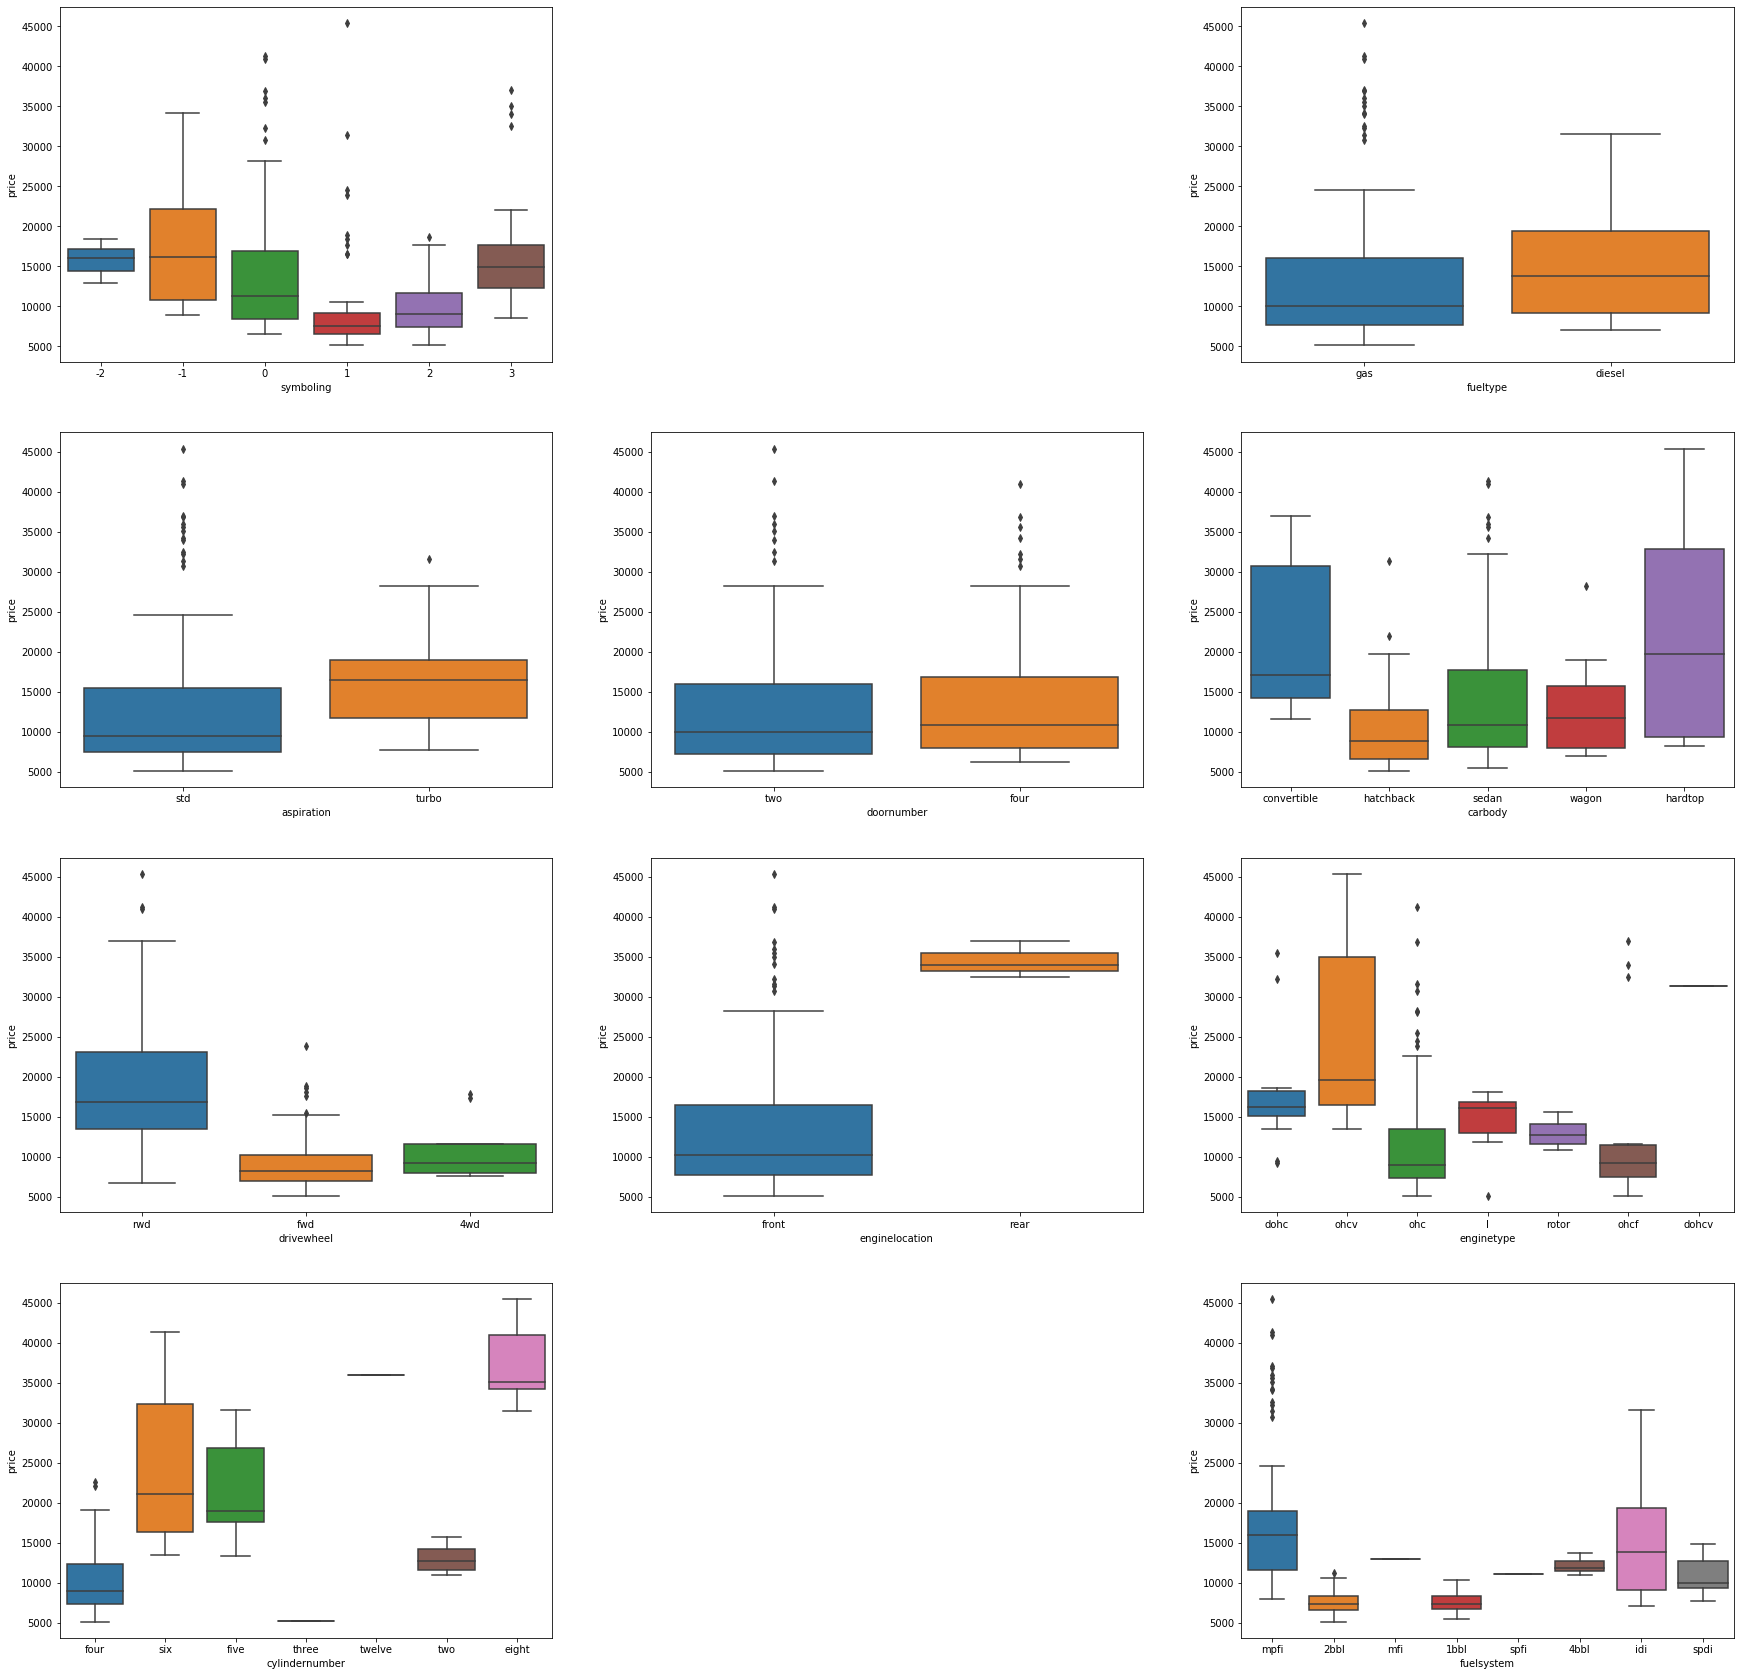

In [28]:
#['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
#'carbody', 'drivewheel', 'enginelocation', 'enginetype',
#       'cylindernumber', 'fuelsystem']

plt.figure(figsize=(30,30))
plt.subplot(4,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = cars_df)
plt.subplot(4,3,3)
sns.boxplot(x = 'fueltype', y = 'price', data = cars_df)
plt.subplot(4,3,4)
sns.boxplot(x = 'aspiration', y = 'price', data = cars_df)
plt.subplot(4,3,5)
sns.boxplot(x = 'doornumber', y = 'price', data = cars_df)
plt.subplot(4,3,6)
sns.boxplot(x = 'carbody', y = 'price', data = cars_df)
plt.subplot(4,3,7)
sns.boxplot(x = 'drivewheel', y = 'price', data = cars_df)
plt.subplot(4,3,8)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars_df)
plt.subplot(4,3,9)
sns.boxplot(x = 'enginetype', y = 'price', data = cars_df)
plt.subplot(4,3,10)
sns.boxplot(x = 'cylindernumber', y = 'price', data = cars_df)
plt.subplot(4,3,12)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars_df)
plt.show()

<font size = 5 color = blue> **Inference:** </font>    
    <br>
<font color = Green>    
- From subplot(4,3,10)- cylindernumber: Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.
<br>
<br>
- From subplot(4,3,12)- fuelsystem: mpfi is most common type of fuel systems. mpfi and idi having the highest price range. 
<br>
<br>
-  From subplot(4,3,7)- drivewheel: A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.
</font>    

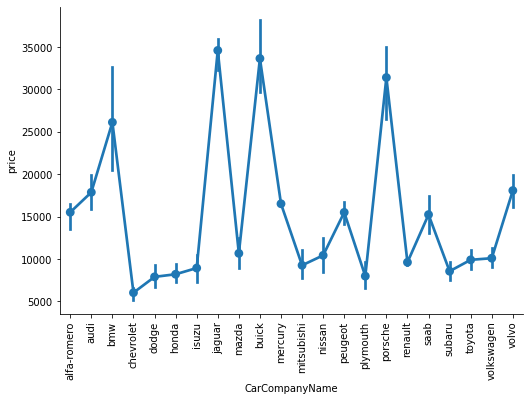

In [29]:
#Car Company feature has more attributes. So using different plots like factorplot, countplot
g = sns.factorplot(x = 'CarCompanyName',aspect=1.5, y = 'price', data = cars_df)
g.set_xticklabels(rotation=90)

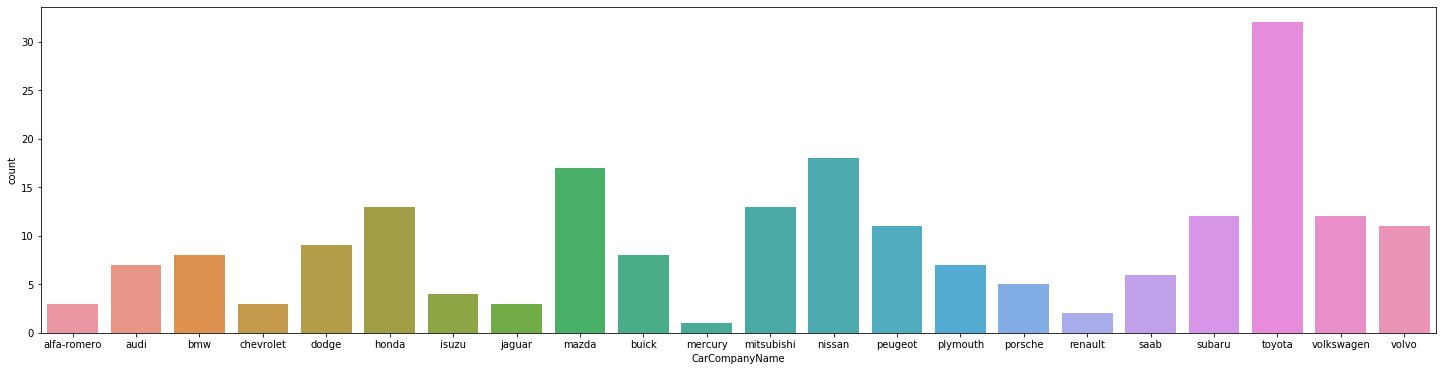

In [30]:
#Countplot for CarCompanyName column:
plt.figure(figsize=(25, 6))
sns.countplot(x = 'CarCompanyName',  data  = cars_df)


<font size = 5 color = blue> **Inference:** </font>    
    <br>
    
- <font size = 5 color = GoldRed> Toyota 🚘 seemed to be most Frequently bought cars among all companies.

[Text(0, 0.5, 'Frequency of fuel type'), Text(0.5, 0, 'Fuel Type')]

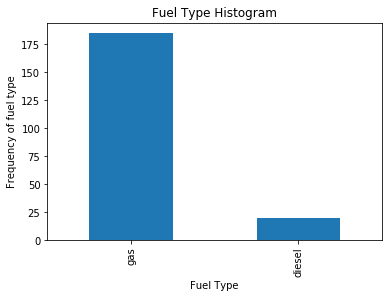

In [31]:
plt1 = cars.fueltype.value_counts().plot('bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

<font size = 5 color = blue> **Inference:** </font>    
    <br>
    
- <font size = 5 color = GoldBlack> cars of fuel type **Gas/Petrol: ⛽️** is most likely choosen.</font>

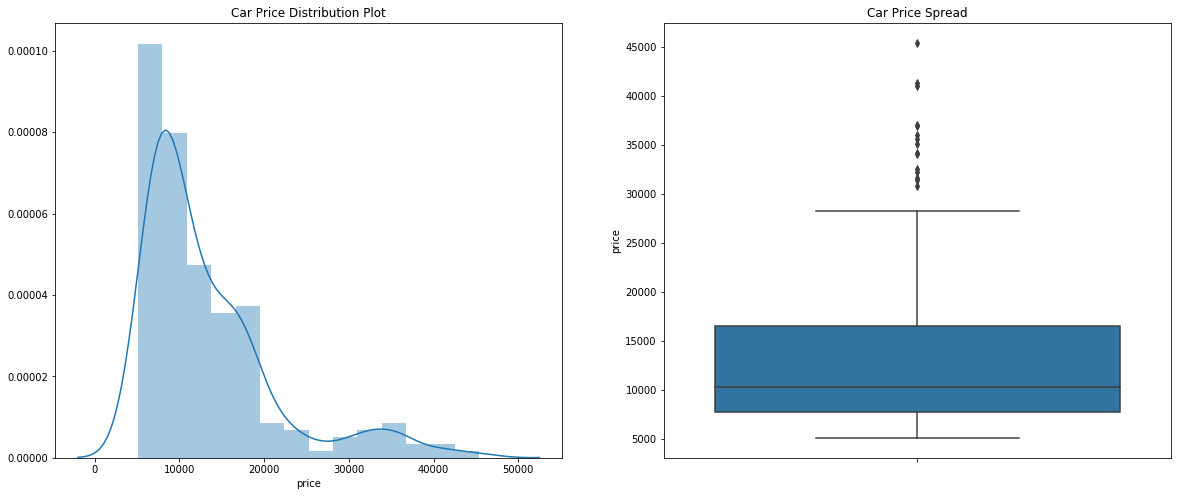

In [32]:
#Price feature distribution:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

In [33]:
#Checking the Outliers for 'AMT_CREDIT' column
print(cars.price.describe(percentiles = [0.70,0.85,0.9]).round(0))

count      205.0
mean     13277.0
std       7989.0
min       5118.0
50%      10295.0
70%      15458.0
85%      18500.0
90%      22563.0
max      45400.0
Name: price, dtype: float64


<font size = 5 color = blue> **Inference:** </font>    
    <br>
    
- plot is right-skewed, meaning that the most prices in the dataset are low which is < 15,500.
- There is a significant difference between the mean and the median of the price distribution.
- The data points are far spread out from the mean, which indicates a high variance in the car prices.
> 85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.

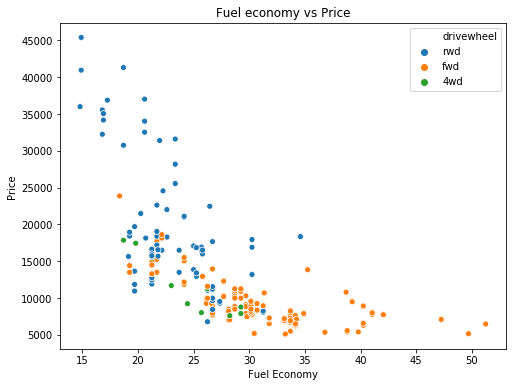

<Figure size 432x288 with 0 Axes>

In [34]:
#Bivariate Analysis:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=cars['fueleconomy'],y=cars['price'],hue=cars['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

## <font size=5 color = Blue> Inference: </font> 
- **fueleconomy** feature has an obvios negative correlation with price and is significant.

## <font color = GOLDRED> Step 3: Data Preparation </font> 

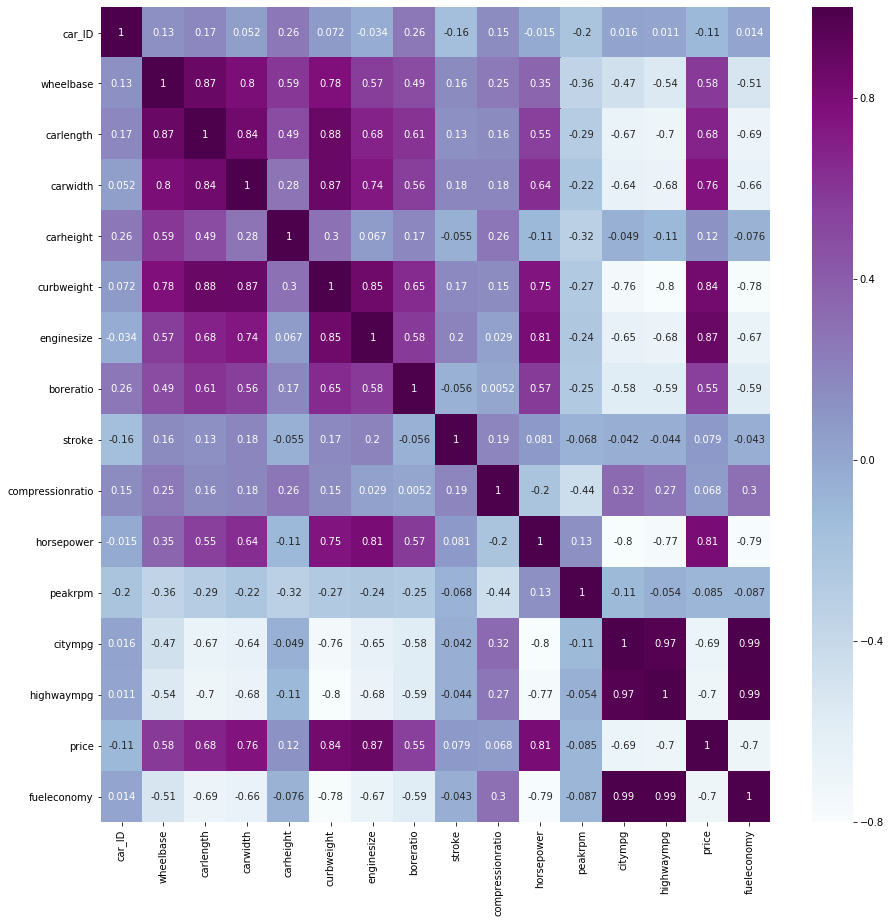

In [35]:
# Heatmap for numerical and continuous cloumns 
#we can see the correlation of predictor variables with price
corr_mat = cars_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat,cmap ="BuPu", annot =True)
#plt.show()

## <font size=5 color = Blue> Inference: </font> 
- **price** feature has very less correlation with peakrpm,compressionratio,stroke, etc..

**List of Significant features/Columns are:**
    
- Car Range 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Fuel Economy
- Car Company Name

In [36]:
cars_df.columns = cars_df.columns.str.lower()
cars_df.head()

,car_id,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompanyname,fueleconomy,carsrange
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,13495,alfa-romero,23.70,Medium
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,16500,alfa-romero,23.70,Medium
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154,5000,19,26,16500,alfa-romero,22.15,Medium
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102,5500,24,30,13950,audi,26.70,Medium
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115,5500,18,22,17450,audi,19.80,Medium


In [37]:
#Cars Linear Regression object :(cars_lr) from the cars_df:
cars_lr = cars_df[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange','carcompanyname']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange,carcompanyname
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium,alfa-romero
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium,alfa-romero
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium,alfa-romero
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium,audi
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium,audi


In [38]:
#Shape before dummies:
cars_lr.shape

(205, 17)

In [39]:
# Defining the map function for Dummies creation:
# Here assigning dummies & dropped corresponding column
# Combining dummies with cars df

def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

# Applying the function to the cars_lr

cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('carsrange',cars_lr)
cars_lr = dummies('carcompanyname',cars_lr)
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,0,0,0,0,0,0,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,0,0,0,0,0,0,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,0,0,0,0,0,0,0,0,0,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,0,0,0,0,0,0,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#Shape after dummies:
cars_lr.shape

(205, 52)


# Inference After Dummies :

<br>
<font color = green>
> All the selected Categorical columns are now splitted into numeric (sub Categories will be assigned numeric). 
<br>
> Before Dummies it is: 17 & After dummies the features count is: 52
</font>

## <font color=Blue> Step 4: Splitting the Data into Training and Testing Sets</font>

- As you know, the first basic step for regression is performing a train-test split.

In [41]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [43]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [44]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,...,0,0,1,0,0,0,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,...,0,0,0,1,0,0,0,0,0,0
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,...,0,0,0,0,0,0,0,1,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,...,0,0,0,0,0,0,0,0,0,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,...,0,0,0,0,0,0,0,0,0,1


In [45]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.358265,0.525476,0.461655,0.909091,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.185980,0.204848,0.184517,0.288490,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.198903,0.399187,0.304167,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.344307,0.502439,0.425000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.512346,0.669919,0.550000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


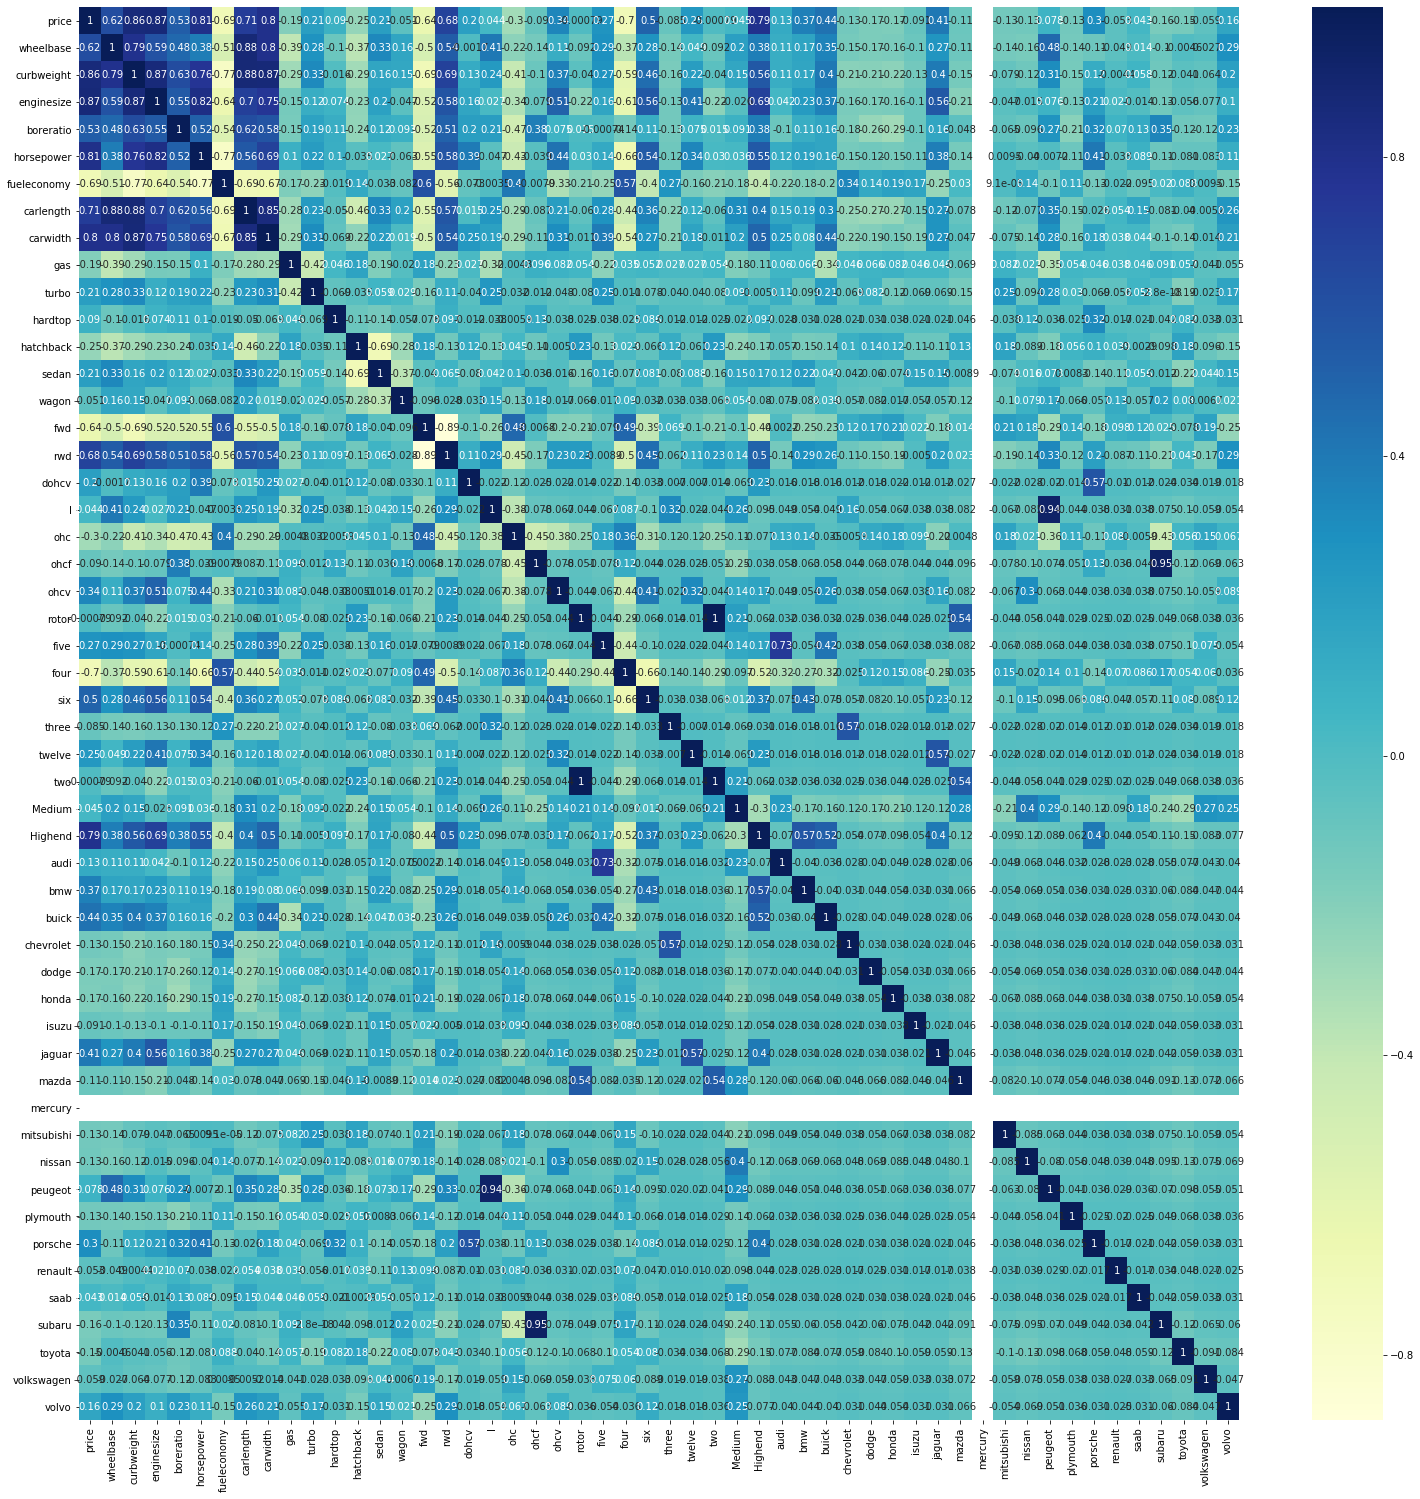

In [46]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (26, 26))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## <font size=5 color = Blue> Inference: </font> 
-  **curbweight, enginesize, horsepower,carwidth and highend.** feature has High correlation with price and they are significant.




In [47]:
df_train.columns

Index(['price', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'horsepower', 'fueleconomy', 'carlength', 'carwidth', 'gas', 'turbo',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three',
       'twelve', 'two', 'Medium', 'Highend', 'audi', 'bmw', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype='object')

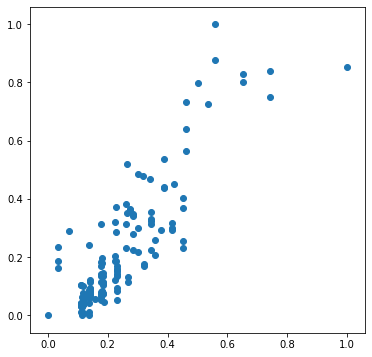

In [48]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.enginesize, df_train.price)
plt.show()

In [49]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

## <font color=Blue> Step 5: Building a linear model</font>

# Recursive Feature Elimination

- Recursive Feature Elimination (RFE) as its title suggests recursively removes features, builds a model using the remaining attributes and calculates model accuracy. 

- RFE is able to work out the combination of attributes that contribute to the prediction on the target variable (or class). 

- Scikit Learn does most of the heavy lifting just import RFE from sklearn.

In [50]:
#Importing RFE from sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor


feature_selection and pass any classifier model to the RFE() method with the number of features to select. 
Using familiar Scikit Learn syntax, the .fit() method must then be called.

In [51]:
#Linear Model(lm) Object for LinearRegression:
lm = LinearRegression()
lm.fit(X_train,y_train)
#Using RFE(Recursive Feature Eliminatation)
#create the RFE model for the svm classifier  and select attributes:
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

- ref.support_ returns an array with boolean values to indicate whether an attribute was selected using 
RFE e.g. For a given dataset this array is [False True True True]. 

- ref.ranking_ returns an array with positive integer values to indicate the attribute ranking with a lower score
indicating a higher ranking 
e.g. for a given dataset this array is [2 1 1 1].which means that 2nd 3rd 4th features are higher than first

In [52]:
# print summaries for the selection of attributes
print(rfe.support_)
print(rfe.ranking_)

[False  True False False  True  True False  True False False  True  True
  True  True False False  True False False  True False False False False
 False  True False  True False  True False  True False False False False
 False False False False False False False False False False False  True
 False False False]
[10  1  5  2  1  1 13  1 36 19  1  1  1  1 34 20  1 16 28  1 29  6 23 14
  7  1  4  1 21  1 12  1 18 24 33 30 11 22 27 37 17 26 15 35  8 31  9  1
 25 32  3]


In [53]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 10),
 ('curbweight', True, 1),
 ('enginesize', False, 5),
 ('boreratio', False, 2),
 ('horsepower', True, 1),
 ('fueleconomy', True, 1),
 ('carlength', False, 13),
 ('carwidth', True, 1),
 ('gas', False, 36),
 ('turbo', False, 19),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 34),
 ('rwd', False, 20),
 ('dohcv', True, 1),
 ('l', False, 16),
 ('ohc', False, 28),
 ('ohcf', True, 1),
 ('ohcv', False, 29),
 ('rotor', False, 6),
 ('five', False, 23),
 ('four', False, 14),
 ('six', False, 7),
 ('three', True, 1),
 ('twelve', False, 4),
 ('two', True, 1),
 ('Medium', False, 21),
 ('Highend', True, 1),
 ('audi', False, 12),
 ('bmw', True, 1),
 ('buick', False, 18),
 ('chevrolet', False, 24),
 ('dodge', False, 33),
 ('honda', False, 30),
 ('isuzu', False, 11),
 ('jaguar', False, 22),
 ('mazda', False, 27),
 ('mercury', False, 37),
 ('mitsubishi', False, 17),
 ('nissan', False, 26),
 ('peugeot', False, 15),
 ('ply

In [54]:
X_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'fueleconomy', 'carwidth', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'dohcv', 'ohcf', 'three', 'two',
       'Highend', 'bmw', 'subaru'],
      dtype='object')

In [55]:
# Building using Stats Model:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,horsepower,fueleconomy,carwidth,hardtop,hatchback,sedan,wagon,dohcv,ohcf,three,two,Highend,bmw,subaru
122,0.272692,0.083333,0.530864,0.291667,0,0,1,0,0,0,0,0,0,0,0
125,0.500388,0.395833,0.213992,0.666667,0,1,0,0,0,0,0,0,1,0,0
166,0.314973,0.266667,0.344307,0.308333,0,1,0,0,0,0,0,0,0,0,0
1,0.411171,0.262500,0.244170,0.316667,0,0,0,0,0,0,0,0,0,0,0
199,0.647401,0.475000,0.122085,0.575000,0,0,0,1,0,0,0,0,0,0,0


### Model building Function - **build_model**:
#### Contains three steps of :
 - Adding the constant
 - fitting the model 
 - model summary


In [56]:
#build_model function    
def build_model(X,y):
    X = sm.add_constant(X) #1
    lm = sm.OLS(y,X).fit() #2
    print(lm.summary()) # 3
    return X


# Checking VIF:
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [57]:

#Function to checkVIF:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### Model-1

In [87]:
X_train_new10 = build_model(X_train_rfe,y_train)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     135.7
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.79e-70
Time:                        18:08:33   Log-Likelihood:                 219.66
No. Observations:                 143   AIC:                            -407.3
Df Residuals:                     127   BIC:                            -359.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0890      0.043     -2.051      

In [88]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new10)

,Features,VIF
0,const,88.15
10,ohcf,20.17
15,subaru,19.63
7,sedan,10.50
6,hatchback,9.71
1,curbweight,9.08
2,horsepower,5.91
4,carwidth,5.56
8,wagon,5.43
3,fueleconomy,4.89


## <font size=5 color = Blue> Inference: </font> 
    
- p-vale feature **three** is higher than the significance value of 0.05, 
    hence initially dropping it as it is insignificant in presence of other variables.

In [89]:
X_train_new1 = X_train_new10.drop(["three"], axis = 1)

### Model-2

In [90]:
X_train_new20 = build_model(X_train_new1,y_train)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     142.4
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           8.25e-71
Time:                        18:09:00   Log-Likelihood:                 217.70
No. Observations:                 143   AIC:                            -405.4
Df Residuals:                     128   BIC:                            -361.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0997      0.043     -2.294      

In [91]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new20)

,Features,VIF
0,const,86.64
10,ohcf,20.15
14,subaru,19.60
7,sedan,10.50
6,hatchback,9.71
1,curbweight,8.98
2,horsepower,5.80
4,carwidth,5.46
8,wagon,5.43
3,fueleconomy,4.54


## <font size=5 color = Blue> Inference for Model-2: </font> 

> Now all the p-values under the significance level: 0.05
> Now eliminating based on VIF:
- Dropping ohcf because of high VIF value. (shows that ohcf has high multicollinearity.)

In [92]:
X_train_new2 = X_train_new20.drop(["ohcf"], axis = 1)

# Model-3

In [93]:
X_train_new30 = build_model(X_train_new2,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     139.7
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           2.77e-69
Time:                        18:09:32   Log-Likelihood:                 210.95
No. Observations:                 143   AIC:                            -393.9
Df Residuals:                     129   BIC:                            -352.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0975      0.045     -2.150      

In [97]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new30)

,Features,VIF
0,const,86.62
7,sedan,10.46
6,hatchback,9.70
1,curbweight,8.76
2,horsepower,5.43
4,carwidth,5.42
8,wagon,5.38
3,fueleconomy,4.54
11,Highend,2.71
12,bmw,1.85


## <font size=5 color = Blue> Inference for Model-3: </font> 
    
- p-vale feature **hardtop** is higher than the significance value of 0.05, 
    hence next dropping it as it is insignificant in presence of other variables.

In [94]:
X_train_new3 = X_train_new30.drop(["hardtop"], axis = 1)

# Model -4

In [95]:
X_train_new40 = build_model(X_train_new3,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     151.3
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           3.63e-70
Time:                        18:10:05   Log-Likelihood:                 210.39
No. Observations:                 143   AIC:                            -394.8
Df Residuals:                     130   BIC:                            -356.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1128      0.043     -2.637      

In [98]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new40)

,Features,VIF
0,const,76.99
1,curbweight,8.67
6,sedan,6.60
5,hatchback,5.97
4,carwidth,5.41
2,horsepower,5.21
3,fueleconomy,4.46
7,wagon,3.80
10,Highend,2.71
11,bmw,1.85


## <font size=5 color = Blue> Inference for Model-4: </font>     
- p-vale feature **subaru** is higher than the significance value of 0.05, 
    hence initially dropping it as it is insignificant in presence of other variables.

In [100]:
X_train_new4 = X_train_new40.drop(["subaru"], axis = 1)

# Model-5:

In [101]:
X_train_new50 = build_model(X_train_new4,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     164.9
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           4.58e-71
Time:                        18:13:24   Log-Likelihood:                 209.83
No. Observations:                 143   AIC:                            -395.7
Df Residuals:                     131   BIC:                            -360.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1199      0.042     -2.841      

In [102]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new50)

,Features,VIF
0,const,74.92
1,curbweight,8.48
6,sedan,6.55
5,hatchback,5.96
4,carwidth,5.41
2,horsepower,5.21
3,fueleconomy,4.34
7,wagon,3.68
10,Highend,2.70
11,bmw,1.84


## <font size=5 color = Blue> Inference for Model-5: </font> 

> From VIF:
- Dropping **curbweight** because of high VIF value. (shows that curbweight has high multicollinearity.)

In [103]:
X_train_new5 = X_train_new50.drop(["curbweight"], axis = 1)

# Model-6:

In [104]:
X_train_new60 = build_model(X_train_new5,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     156.4
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           4.34e-68
Time:                        18:16:22   Log-Likelihood:                 199.51
No. Observations:                 143   AIC:                            -377.0
Df Residuals:                     132   BIC:                            -344.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0906      0.045     -2.031      

In [105]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new60)

,Features,VIF
0,const,73.15
5,sedan,6.55
4,hatchback,5.92
1,horsepower,4.60
2,fueleconomy,4.16
6,wagon,3.56
3,carwidth,2.83
9,Highend,2.57
10,bmw,1.83
7,dohcv,1.46


## <font size=5 color = Blue> Inference for Model-6: </font> 

> From VIF:
- Dropping **sedan** because of high VIF value. (shows that curbweight has high multicollinearity.)

In [106]:
X_train_new6 = X_train_new60.drop(["sedan"], axis = 1)

# Model-7:

In [107]:
X_train_new70 = build_model(X_train_new6,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     159.7
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           8.71e-67
Time:                        18:17:27   Log-Likelihood:                 193.45
No. Observations:                 143   AIC:                            -366.9
Df Residuals:                     133   BIC:                            -337.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1412      0.044     -3.227      

In [110]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new70)

,Features,VIF
0,const,65.10
1,horsepower,4.58
2,fueleconomy,4.07
3,carwidth,2.53
8,Highend,2.45
9,bmw,1.71
6,dohcv,1.46
4,hatchback,1.32
7,two,1.23
5,wagon,1.16



## <font size=5 color = Blue> Inference for Model-7: </font>     
- p-vale feature **wagon** is higher than the significance value of 0.05, 
    hence dropping it as it is insignificant in presence of other variables.

In [108]:
X_train_new7 = X_train_new70.drop(["wagon"], axis = 1)

# Model-8

In [109]:
X_train_new80 = build_model(X_train_new7,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           8.03e-68
Time:                        18:18:13   Log-Likelihood:                 193.18
No. Observations:                 143   AIC:                            -368.4
Df Residuals:                     134   BIC:                            -341.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1497      0.042     -3.561      

In [111]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new80)

,Features,VIF
0,const,60.24
1,horsepower,4.46
2,fueleconomy,3.89
3,carwidth,2.52
7,Highend,2.45
8,bmw,1.70
5,dohcv,1.44
4,hatchback,1.23
6,two,1.23




## <font size=5 color = Blue> Inference for Model-8: </font>     
- p-vale feature **bmw** is higher than the significance value of 0.05, 
    hence dropping it as it is insignificant in presence of other variables.

In [112]:

X_train_new8 = X_train_new80.drop(["bmw"], axis = 1)

# Model-9

In [113]:
X_train_new90 = build_model(X_train_new8,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     205.9
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           8.64e-69
Time:                        18:19:45   Log-Likelihood:                 192.67
No. Observations:                 143   AIC:                            -369.3
Df Residuals:                     135   BIC:                            -345.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1396      0.041     -3.427      

In [114]:

#Calculating the Variance Inflation Factor
checkVIF(X_train_new90)

,Features,VIF
0,const,56.65
1,horsepower,4.43
2,fueleconomy,3.81
3,carwidth,2.32
7,Highend,1.56
5,dohcv,1.44
4,hatchback,1.23
6,two,1.23



## <font size=5 color = Blue> Inference for Model-9: </font>     
- p-vale feature **fueleconomy** is higher than the significance value of 0.05, 
    hence dropping it as it is insignificant in presence of other variables.

In [116]:

X_train_new9 = X_train_new90.drop(["fueleconomy"], axis = 1)

# Model -10

In [117]:
X_train_new100 = build_model(X_train_new9,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     239.2
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.09e-69
Time:                        18:21:22   Log-Likelihood:                 191.92
No. Observations:                 143   AIC:                            -369.8
Df Residuals:                     136   BIC:                            -349.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0955      0.018     -5.457      0.0

In [118]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new100)

,Features,VIF
0,const,10.43
1,horsepower,2.40
2,carwidth,2.09
6,Highend,1.54
4,dohcv,1.21
3,hatchback,1.19
5,two,1.07


## <font size=5 color = Blue> Inference for Model-10: </font> 

> From VIF:
- Dropping **two** because of high VIF value. (shows that curbweight has high multicollinearity.)

In [119]:
#Dropping two
X_train_new_10 = X_train_new100.drop(["two"], axis = 1)

# Model-11

In [120]:
X_train_new110 = build_model(X_train_new_10,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.57e-70
Time:                        18:25:48   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [121]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new110)

,Features,VIF
0,const,10.39
1,horsepower,2.39
2,carwidth,2.08
5,Highend,1.53
4,dohcv,1.21
3,hatchback,1.13


## <font size=5 color = Blue> Inference for Model-11: </font> 

>  VIF: Within the Range < 3  & p - value also less than signficant level < 0.05 for all the predictor variables.

### <font color = red> So the Best model is Model-11 here R2 & Adjusted R2 almost same.</font>

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [123]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

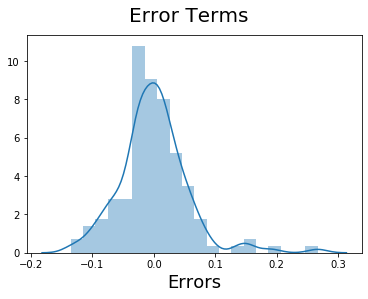

In [124]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  
plt.xlabel('Errors', fontsize = 18) 

<font color = Blue size = 5>  **Inference:** </font>
<br>
<br>
**Error terms** seem to be approximately **normally distributed**, so the assumption on the linear modeling seems to be **fulfilled**.



## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. seventh model.

#### Applying the scaling on the test sets

In [128]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [129]:
df_test.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.209644,0.370121,0.371743,0.228835,0.667691,0.359521,0.459039,0.486741,0.375212,0.887097,...,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645
std,0.210911,0.179970,0.222354,0.188416,0.228484,0.252970,0.234994,0.183964,0.208977,0.319058,...,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076536,0.265306,0.219125,0.126638,0.515873,0.140323,0.254604,0.389764,0.221053,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.136847,0.327988,0.344065,0.183406,0.674603,0.312903,0.434622,0.475591,0.326316,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.280049,0.482507,0.540726,0.287118,0.857143,0.432258,0.602210,0.642126,0.421053,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [130]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [131]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [132]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.Evaluation of test via comparison of y_pred and y_test

In [133]:
# Comparision:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8471337630763662

Text(0, 0.5, 'y_pred')

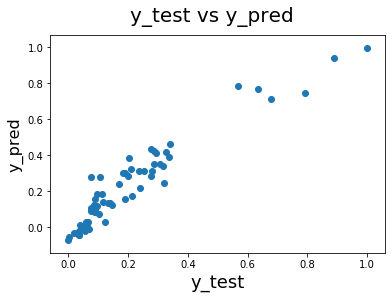

In [134]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

Text(0, 0.5, 'Car Price')

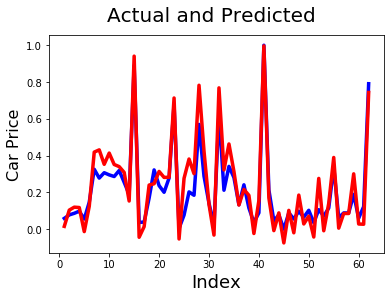

In [137]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)  

In [140]:
#Evaluation of this model using Statistics :

X_train_new110

,const,horsepower,carwidth,hatchback,dohcv,Highend
122,1.0,0.083333,0.291667,0,0,0
125,1.0,0.395833,0.666667,1,0,1
166,1.0,0.266667,0.308333,1,0,0
1,1.0,0.262500,0.316667,0,0,0
199,1.0,0.475000,0.575000,0,0,0
190,1.0,0.175000,0.308333,1,0,0
96,1.0,0.087500,0.291667,0,0,0
177,1.0,0.183333,0.516667,1,0,0
181,1.0,0.450000,0.516667,0,0,0
97,1.0,0.087500,0.291667,0,0,0


In [141]:
#Final Model Statistics:
X_train_new110 = build_model(X_train_new_10,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Sun, 19 Jan 2020   Prob (F-statistic):           1.57e-70
Time:                        18:50:54   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

<font size = 5 color = "Blue">
**Final Model Inference For MLR Equation:**
    <br>
    
    -0.0970 + 0.5013 * (horsepower) + 0.3952 * (carwidth) + -0.0336 * (hatchback) + -0.3231 *(dohcv) + 0.2833 * (Highend)
   
   <br>
    <br>
</font>


<font size = 3 color = "Red">
**Final Statistical Inference :**
</font> 


<br>
<br>

<font color = "GREEN">

- R-sqaured and Adjusted R-squared (extent of fit) - 0.912 and 0.909 - 91% variance explained.
<br>

- F-stats and Prob(F-stats) (overall model fit) - 284.8 and 1.57e-70(approx. 0.0) - Model fir is significant and explained 91% variance is just not by chance.
<br>

- p-values - p-values for all of the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.
</font>


<font size = 3 color = "Red">
    ** Final Business Inference :**
</font> 

<font color = "BLACK">
<br>
<br>

- So Significant features of this model is : **horsepower,carwidth,hatchback,dohcv,Highend**
<br>

- Cars which are having **High Horse power** Influence price.
<br>

- Cars which are **Highend Models** are price heavy.
<br>

- **Hatchback** segment have significant Influence in among all car segments but negatively correlated.
<br>

- **carwidth** is key factor while considering cars.
<br>

- **Engine type especially: dohcv** negatively effecting in car price.

**************************** Thanks you ***************************************